In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('../Data/macrodata.csv', index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


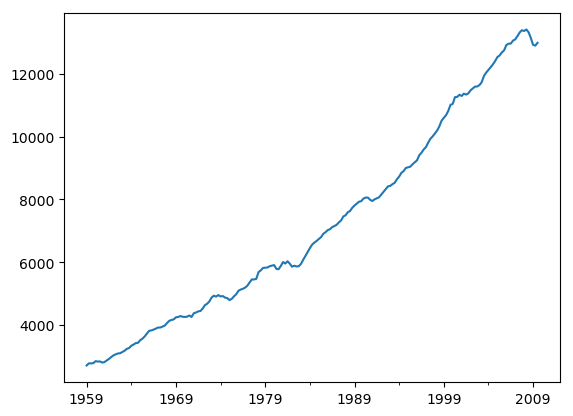

In [4]:
df['realgdp'].plot()

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

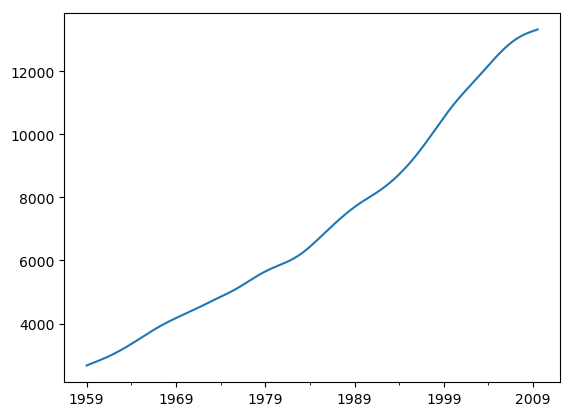

In [7]:
gdp_trend.plot()

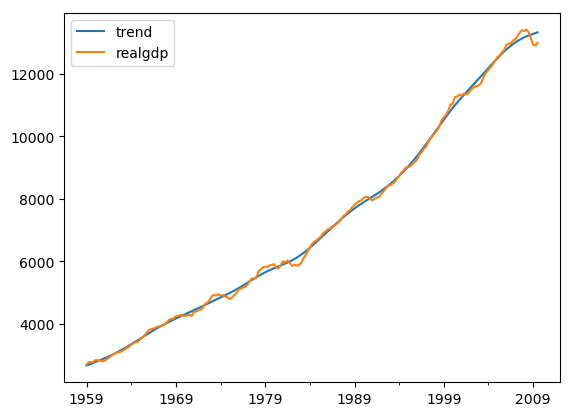

In [8]:
df['trend'] = gdp_trend
df[['trend', 'realgdp']].plot.line()

In [9]:
airline = pd.read_csv('../Data/airline_passengers.csv', index_col='Month', parse_dates=True)
airline_backup = airline.copy()
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


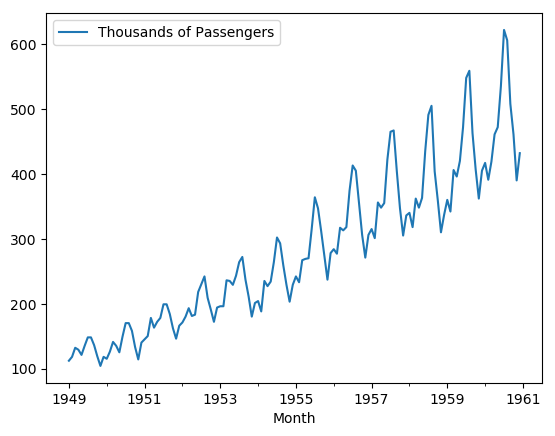

In [11]:
airline.plot.line()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

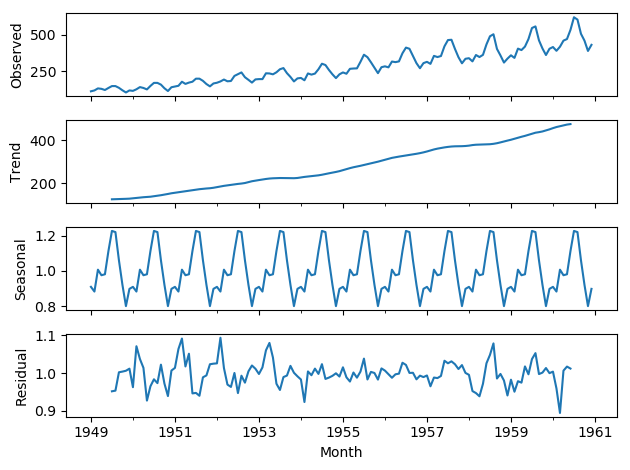

In [13]:
seasonal_decompose(airline['Thousands of Passengers'], model="multiplicative").plot();

In [14]:
import matplotlib.pyplot as plt

In [15]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [16]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [17]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

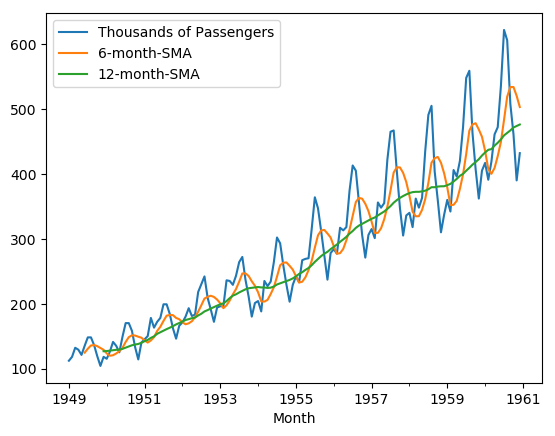

In [18]:
airline.plot()

In [19]:
airline['EWMA-12']  = airline['Thousands of Passengers'].ewm(span=12).mean()

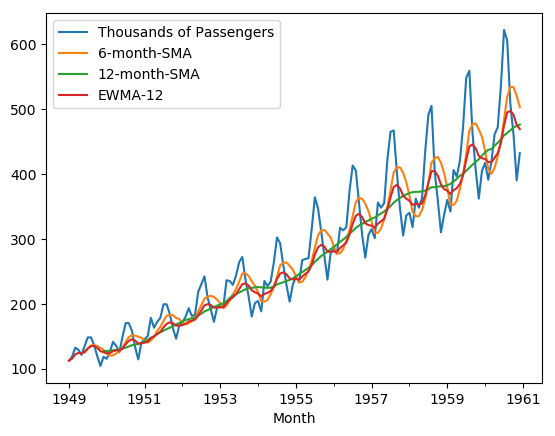

In [20]:
airline.plot()

In [21]:
df = airline_backup.copy()

In [22]:
df = df.dropna()

In [23]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [24]:
df.index.freq = 'MS'

In [25]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [26]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
span = 12
alpha = 2/(span+1)

In [29]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [30]:
model = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False)

In [31]:
df['SES12'] = model.fittedvalues.shift(-1)

In [32]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

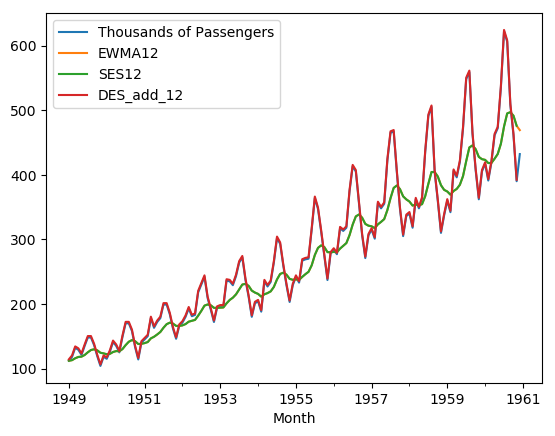

In [37]:
df.plot()

In [38]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

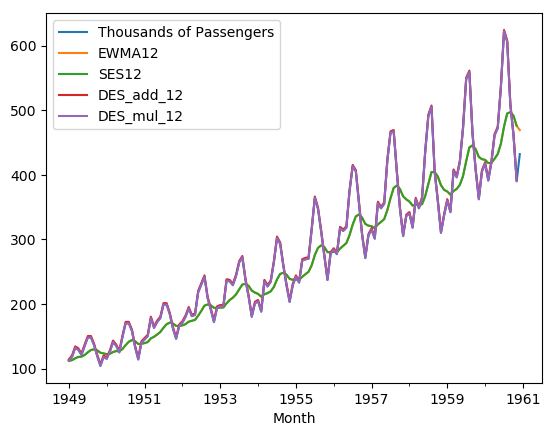

In [39]:
df.plot()

In [40]:
df['TES_mul_12'] = ExponentialSmoothing(
    df['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12).fit().fittedvalues.shift(-1)

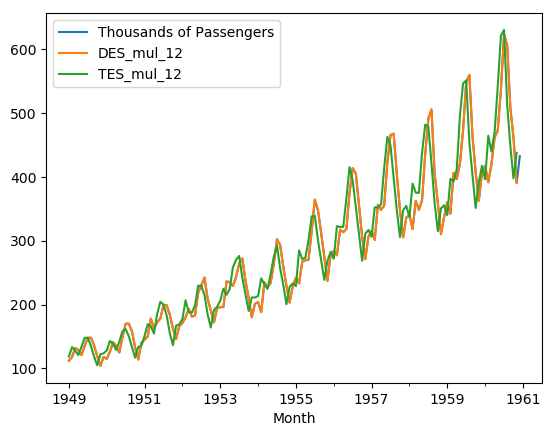

In [42]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot()